In [16]:
import numpy as np
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import matplotlib.pyplot as plt

In [17]:
def generate_dataset():
 x_batch = np.linspace(0, 2, 100)
 y_batch = 1.5 * x_batch + np.random.randn(*x_batch.shape) * 0.2 + 0.5
 return x_batch, y_batch

In [18]:
def linear_regression():
  x = tf.placeholder(tf.float32, shape=(None, ), name='x')
  y = tf.placeholder(tf.float32, shape=(None, ), name='y')

  with tf.variable_scope('lreg') as scope:
    w = tf.Variable(np.random.normal(), name='W')
    b = tf.Variable(np.random.normal(), name='b')

    y_pred = tf.add(tf.multiply(w, x), b)

    loss = tf.reduce_mean(tf.square(y_pred - y))

  return x, y, y_pred, loss

In [19]:
def run():
  x_batch, y_batch = generate_dataset()
  x, y, y_pred, loss = linear_regression()

  optimizer = tf.train.GradientDescentOptimizer(0.1)
  train_op = optimizer.minimize(loss)

  with tf.Session() as session:
    session.run(tf.global_variables_initializer())
    feed_dict = {x: x_batch, y: y_batch}

    for i in range(30):
      session.run(train_op, feed_dict)
      print(i, "loss:", loss.eval(feed_dict))

    print('Predicting')
    y_pred_batch = session.run(y_pred, {x : x_batch})

  plt.scatter(x_batch, y_batch)
  plt.plot(x_batch, y_pred_batch, color='red')
  plt.xlim(0, 2)
  plt.ylim(0, 2)

0 loss: 1.505339
1 loss: 0.5196455
2 loss: 0.20624565
3 loss: 0.10608574
4 loss: 0.073593505
5 loss: 0.06260402
6 loss: 0.05847522
7 loss: 0.05656148
8 loss: 0.055387206
9 loss: 0.05448219
10 loss: 0.05369523
11 loss: 0.05297636
12 loss: 0.052307833
13 loss: 0.05168229
14 loss: 0.051095735
15 loss: 0.05054533
16 loss: 0.050028726
17 loss: 0.04954382
18 loss: 0.04908865
19 loss: 0.048661385
20 loss: 0.048260298
21 loss: 0.047883805
22 loss: 0.0475304
23 loss: 0.047198657
24 loss: 0.046887245
25 loss: 0.046594933
26 loss: 0.046320524
27 loss: 0.046062957
28 loss: 0.04582116
29 loss: 0.0455942
Predicting


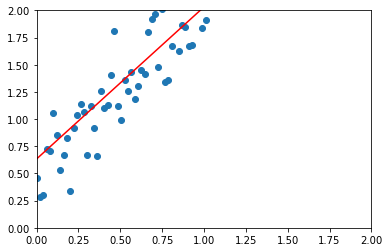

In [20]:
run()